
<p><img  src=https://www.yuntech.edu.tw/images/mainmenu/about/yuntech_logo.jpg alt="Colaboratory logo" height="45px" width="28" align="left" hspace="10px" vspace="27px" style="margin: 27px 10px"></p>
<h1><font color="black" size=5> 金融數據分析與程式設計: </font><font color="Green" size=4>Part2 投資組合與資金配置</font></h1>

#### 歡迎各位同學來到這門課

- 金融數據分析與程式設計**Part1**: 結合`技術分析`觀念與`python程式`決定單支股票買點或賣點
- 金融數據分析與程式設計**Part2**: 使用`python`套件`Scipy.optimize`分析購買2支以上的股票之**最適資金分配比例**

<h4 style="font-weight: bold" align="right"><font color="blue" size=3> 作者：賴怡洵</font> <font size=1>in 2020/08/21</font></h4>

---


### 範例：2資產投資組合
- 以台積電(2330.TW)與台泥(1101.TW)為範例來進行說明
- [2330.TW 資料來源：yahoo finance](https://finance.yahoo.com/quote/2330.TW/history?p=2330.TW)
- [1101.TW 資料來源：yahoo finance](https://finance.yahoo.com/quote/1101.TW/history?p=1101.TW)
- 資料期間：2020/01/01至2020/07/31

##  1. 安裝套件

  * pip install yfinance: yfinance 是yahoo finance的package, 安裝yahoo finance


In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyecharts

Note: you may need to restart the kernel to use updated packages.


## 2. 匯入套件
**匯入會用到的套件：** \
`Pandas`、`Numpy`、`datetime`、`Pandas_datareader`、`Matplotlib`、`Pyecharts`、`yfinance`

In [3]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import numpy as np
import datetime as dt
import pandas_datareader as web
import yfinance as yf
import matplotlib.pyplot as plt
from pyecharts import options as opts   
from pyecharts.charts import Kline

In [4]:
yf.pdr_override()
start_date = dt.datetime(2020, 1, 1)   ##下載交易日起始日期##
end_date= dt.datetime(2020, 7, 31)     ##下載交易日結束日期##
stock_id='2330.TW'
s2330 = web.get_data_yahoo([stock_id], start_date, end_date)
s2330_AdjCP=s2330[["Adj Close"]]
s2330_AdjCP.head(5)

Attributes,Adj Close
Symbols,2330.TW
Date,
2020-01-02,333.075775
2020-01-03,333.567047
2020-01-06,326.198120
2020-01-07,323.741791
2020-01-08,323.741791


In [5]:
yf.pdr_override()
start_date = dt.datetime(2020, 1, 1)   ##下載交易日起始日期##
end_date= dt.datetime(2020, 7, 31)     ##下載交易日結束日期##
stock_id='1101.TW'
s1101 = web.get_data_yahoo([stock_id], start_date, end_date)
s1101_AdjCP=s1101[["Adj Close"]]
s1101_AdjCP.head(5)

Attributes,Adj Close
Symbols,1101.TW
Date,
2020-01-02,41.609627
2020-01-03,41.468098
2020-01-06,40.996334
2020-01-07,41.137859
2020-01-08,40.949158


In [6]:
Adj_Close_Price = pd.concat([s2330_AdjCP, s1101_AdjCP], axis=1)
Adj_Close_Price.tail(10)
#Stock_Returns=Adj_Close_Price.pct_change()
Stock_Returns=Adj_Close_Price["Adj Close"].diff(1)/Adj_Close_Price["Adj Close"].shift(1)
Stock_Returns=Stock_Returns.dropna()  ###利用 dropna() 來移除任何資料存有遺漏值
Stock_Returns.head(10)
#n=len(Stock_Returns)    ###計算樣本數
#n
Stock_Returns.to_excel('Stock_Returns.xlsx', sheet_name='Stock_Return')

In [7]:
Stock_Returns.describe()

Symbols,2330.TW,1101.TW
count,138.000000,138.000000
mean,0.002015,-0.000061
std,0.022079,0.017199
min,-0.055556,-0.068966
25%,-0.010764,-0.005775
50%,0.002153,0.001191
75%,0.011986,0.006987
max,0.099741,0.099702


In [8]:
Stock_Returns.corr()

Symbols,2330.TW,1101.TW
Symbols,,
2330.TW,1.000000,0.601023
1101.TW,0.601023,1.000000


In [9]:
Stock_Returns.cov()

Symbols,2330.TW,1101.TW
Symbols,,
2330.TW,0.000487,0.000228
1101.TW,0.000228,0.000296


In [10]:
data = pd.read_excel('Stock_Returns.xlsx')
data.head(10)
data_set = ['2330.TW','1101.TW']
nos=len(data_set)
nos

2

In [11]:
n=len(data)
data.describe()  ###敘述性統計

,2330.TW,1101.TW
count,138.000000,138.000000
mean,0.002015,-0.000061
std,0.022079,0.017199
min,-0.055556,-0.068966
25%,-0.010764,-0.005775
50%,0.002153,0.001191
75%,0.011986,0.006987
max,0.099741,0.099702


In [15]:
#我們先隨機生成一維投資組合權重向量（長度為2，與股票數量相等），投資組合權重向量中的數值必須在0到1之間
weights = np.random.random(2)
weights /= np.sum(weights)
weights

array([0.58076654, 0.41923346])

In [14]:
np.dot(weights, data.mean())  #投資組合報酬率
annual_PortfR=np.dot(weights, data.mean()*n) #投資組合年化報酬率算法1
annual_PortfR1=np.sum(data.mean()*n*weights) #投資組合年化報酬率算法2
annual_PortfR1

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


0.16758568626726464

In [16]:
# 投資組合變異數
np.dot(weights.T, np.dot(data.cov(), weights))
# 投資組合年化變異數
np.dot(weights.T, np.dot(data.cov()*n, weights))

0.04519996385394364

In [20]:
# 投資組合標準差
np.sqrt(np.dot(weights, np.dot(data.cov(), weights)))

# 投資組合年化標準差
np.sqrt(np.dot(weights, np.dot(data.cov()*n, weights)))

0.21260283124630217

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.


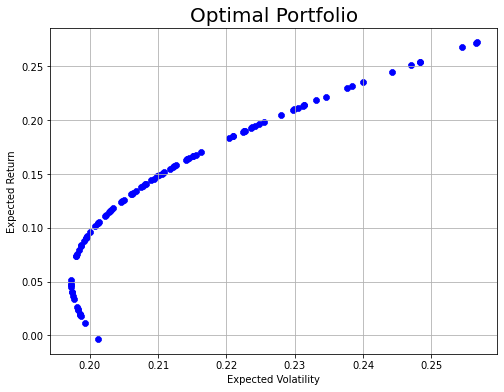

In [22]:
# 自動產生100
import numpy as np
#from numpy import append as app
import statsmodels.api as sm #統計計算
import scipy.stats as scs #科學運算
import matplotlib.pyplot as plt #畫圖


%matplotlib inline
PortfR = []
PortfVar= []
PortfSD = []
PortfSPR = []
Rf = 0.03   #無風險利率設定為0.03

for p in range(100):
    weights = np.random.random(2)
    weights /=np.sum(weights)
    port_returns=np.sum(data.mean()*n*weights)
    port_variance=np.dot(weights.T, np.dot(data.cov()*n,weights))
    port_stddev=np.sqrt(port_variance)
    port_sharpe=(port_returns-Rf)/port_stddev
    
    PortfR.append(port_returns)
    PortfVar.append(port_variance)
    PortfSD.append(port_stddev)
    PortfSPR.append(port_sharpe)
    
#PortfR
#PortfVar
#PortfSD
#PortfSPR


plt.figure(figsize=(8, 6))
figure1=plt.scatter(PortfSD, PortfR, c='b', marker='8')
plt.grid(True)
plt.title("Optimal Portfolio", size=20)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')


plt.show()


In [19]:
import numpy as np
from scipy import stats
from scipy.optimize import minimize 
def statistics(weights):
    weights = np.array(weights)
    port_returns=np.sum(data.mean()*n*weights)
    port_variance=np.dot(weights.T, np.dot(data.cov()*n,weights))
    port_stddev=np.sqrt(port_variance)
    port_sharpe=(port_returns-Rf)/port_stddev
    return np.array([port_returns, port_stddev, port_sharpe])

#定義目標函數
def min_variance(weights,sign=1):
    return sign*np.dot(weights.T, np.dot(data.cov()*n,weights))


#定義限制條件

def constraint1(weights, sign=1):
        return sign*(np.sum(weights)-1)

weights0 = 2*[1./2]
cons = ({'type':'eq', 'fun': constraint1}) #把限制集定義成字典
bnds = tuple((0,1) for weights in range(2)) 
optv = minimize(min_variance, weights0, method = 'SLSQP', bounds = bnds, constraints = cons) 
optv

#optv('weights').round(4)

     fun: 0.038891083635803674
     jac: array([0.07778217, 0.07778217])
 message: 'Optimization terminated successfully'
    nfev: 12
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.20675333, 0.79324667])